In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-predictions-personal/Churn_Predictions.csv


In [2]:
data=pd.read_csv("/kaggle/input/churn-predictions-personal/Churn_Predictions.csv")

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# **EXPLORATORY DATA ANALYSIS**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
 churn=data["Exited"].value_counts().reset_index()
churn.head()

,Exited,count
0,0,7963
1,1,2037


<Axes: xlabel='Exited', ylabel='count'>

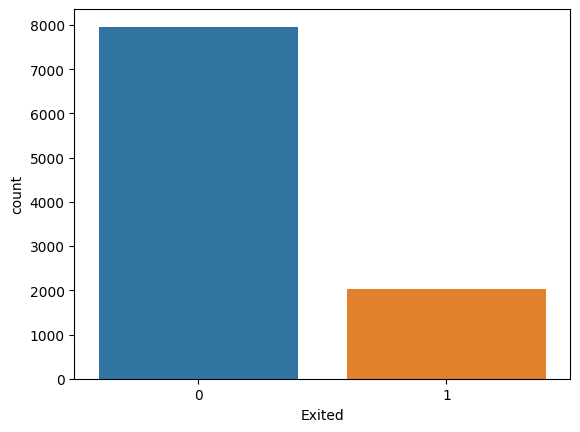

In [8]:
import seaborn as sns
sns.barplot(x=churn["Exited"], y=churn["count"])

<Axes: xlabel='Tenure', ylabel='Density'>

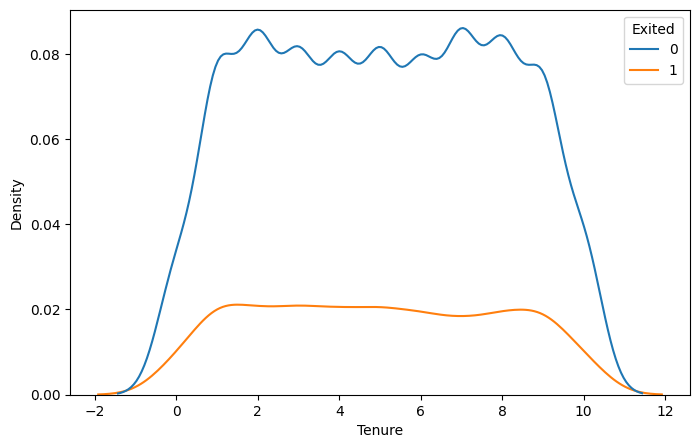

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.kdeplot(x=data["Tenure"], hue=data["Exited"])

<Axes: xlabel='Gender', ylabel='count'>

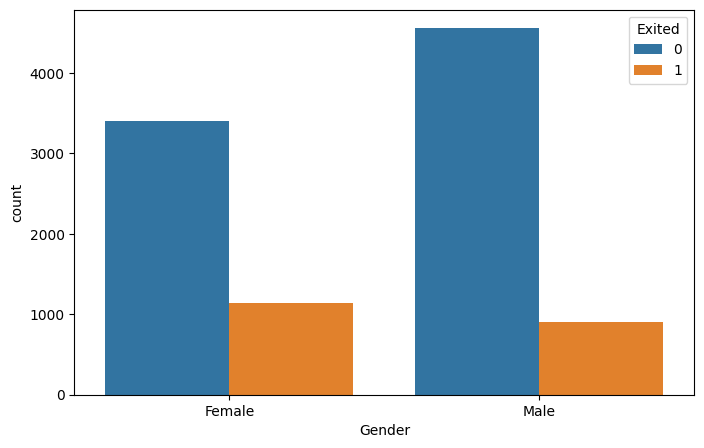

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["Gender"], hue=data["Exited"])

<Axes: xlabel='Tenure', ylabel='count'>

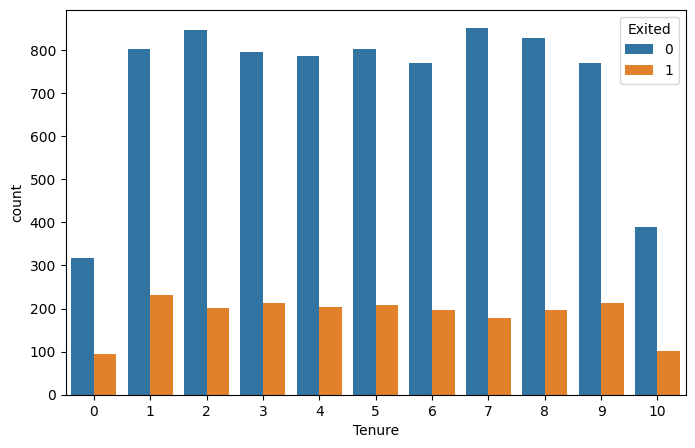

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["Tenure"], hue=data["Exited"])

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

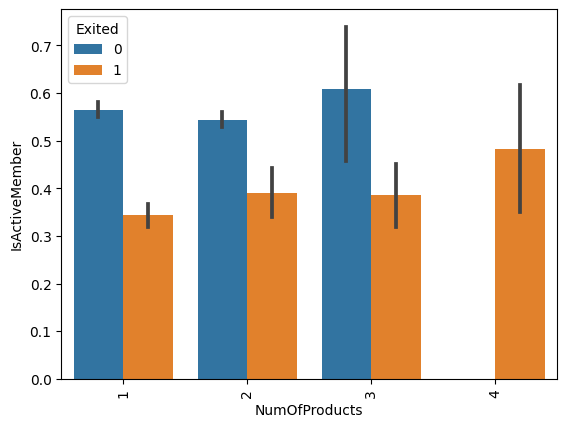

In [12]:
product= sns.barplot(x=data["NumOfProducts"], y=data["IsActiveMember"], hue=data["Exited"])
plt.xticks(rotation=90)

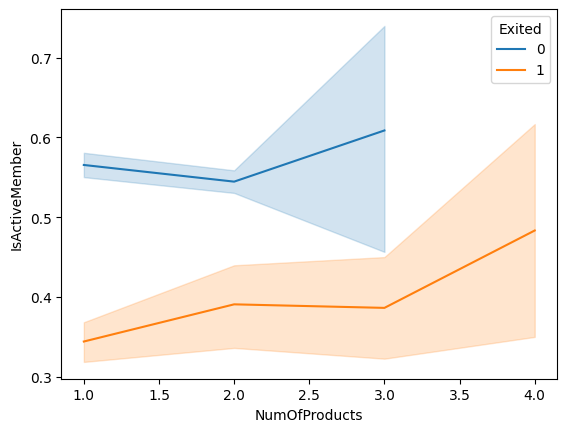

In [13]:
product= sns.lineplot(x=data["NumOfProducts"], y=data["IsActiveMember"], hue=data["Exited"])

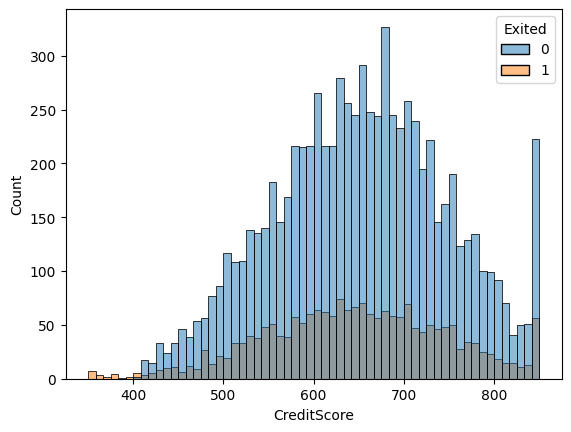

In [14]:
product= sns.histplot(x=data["CreditScore"], hue=data["Exited"], bins=60)

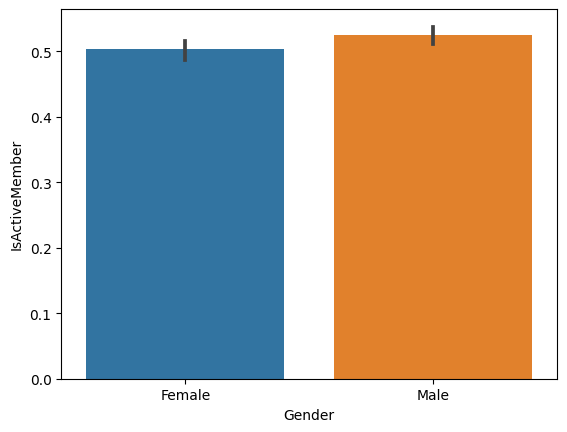

In [15]:
product= sns.barplot(x=data["Gender"], y=data["IsActiveMember"])

In [16]:
country=data["Geography"].value_counts().reset_index()
country.head()

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


<Axes: xlabel='count', ylabel='Geography'>

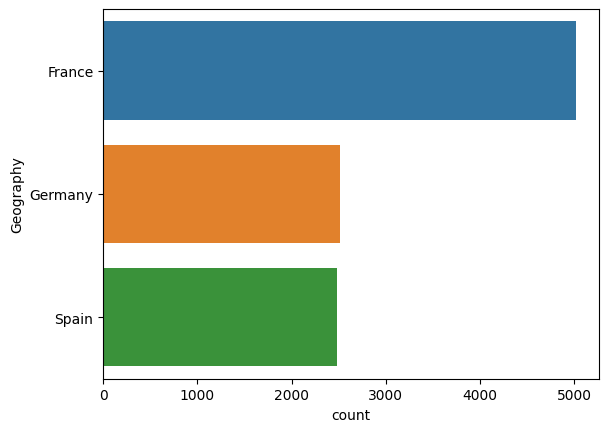

In [17]:
sns.barplot(y=country["Geography"], x=country["count"])

In [18]:
data.duplicated().sum()

0

In [19]:
data["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [20]:
data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [21]:
data.drop(columns=["RowNumber","CustomerId", "Surname"], inplace=True)

In [22]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data= pd.get_dummies(data, columns=["Geography","Gender"], drop_first= True)

In [24]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [25]:
X=data.drop(columns=["Exited"])
y=data["Exited"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split( X,y,test_size=0.2, random_state=1 )

In [26]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [27]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [28]:
X_train.shape

(8000, 11)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [30]:
X_train_scaled
X_test_scaled


array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model= Sequential()
model.add(Dense(11, activation="relu",input_dim=11))
model.add(Dense(11, activation="relu",input_dim=11))
model.add(Dense(1, activation="relu"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [35]:
model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 2.7352 - accuracy: 0.7961 - val_loss: 1.9427 - val_accuracy: 0.7925
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 1.4386 - accuracy: 0.7873 - val_loss: 0.8403 - val_accuracy: 0.7844
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6469 - accuracy: 0.7817 - val_loss: 0.5388 - val_accuracy: 0.7919
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5382 - accuracy: 0.7847 - val_loss: 0.5091 - val_accuracy: 0.7950
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5094 - accuracy: 0.7931 - val_loss: 0.4996 - val_accuracy: 0.8012
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4842 - accuracy: 0.7998 - val_loss: 0.4866 - val_accuracy: 0.8031
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8048 - val_loss: 0.4730 - val_accuracy: 0.8056

In [36]:
model.layers[0].get_weights()

[array([[-0.17595376,  0.00242909, -0.12837882, -0.07635074, -0.03142582,
          0.10758901,  0.04493452, -0.12249057,  0.04764698,  0.08652294,
         -0.03592065],
        [ 0.16110781,  0.4261494 , -0.37242246,  0.34297252,  0.33822408,
         -0.18895574, -0.05817647, -0.82065445, -0.6838548 , -0.22330311,
          0.1492459 ],
        [ 0.00606752,  0.22776604,  0.35538587,  0.31520772,  0.17154343,
         -0.15326777, -0.20792367,  0.16266195,  0.05615315, -0.17311488,
         -0.04473318],
        [ 0.5126835 ,  0.26502538, -0.3860232 ,  0.31834555, -0.3639829 ,
         -0.5677514 ,  0.04996914,  0.20343693,  0.09464043,  0.23325469,
         -0.41694602],
        [ 0.10396393,  0.87951946,  0.1208365 , -0.5122935 , -0.66473424,
          0.6144115 ,  0.6615851 , -0.17424756, -0.20365539, -0.12612875,
         -0.06130988],
        [-0.0807211 ,  0.22486168,  0.30361262,  0.5280754 , -0.01136873,
         -0.01927181, -0.32485276, -0.11353169, -0.04806327, -0.0249680

In [37]:
model.layers[1].get_weights()

[array([[-0.6571853 ,  0.04398872, -0.1840712 , -0.8605681 ,  0.24137664,
         -0.4070785 , -0.56782234, -0.38012648,  0.11474694,  0.27256548,
          0.44171244],
        [-0.4101399 , -0.16826561,  0.6778937 , -0.05239883, -0.2677454 ,
          0.3912574 ,  0.4935781 , -0.3564841 , -0.17844085,  0.04242447,
         -0.21826863],
        [ 0.1065726 , -0.03644439, -0.0837231 , -0.494139  , -0.13251494,
         -0.39539862,  0.15032281,  0.3540304 , -0.34311566, -0.02296122,
         -0.441456  ],
        [ 0.4178171 , -0.43772846, -0.41123798,  0.40874776, -0.25157592,
         -0.16991259, -0.0210204 , -0.4846916 , -1.0694418 ,  0.54805106,
         -0.30295554],
        [ 0.12873453,  0.25178474, -0.2624589 , -0.0204651 , -0.39611396,
          0.3138765 ,  0.00426341, -0.4838846 , -0.51084954,  0.11277339,
          0.05361677],
        [ 0.25130758, -0.93159467,  0.05000757, -0.44135284, -0.05550118,
          0.16401082, -0.0305196 ,  0.26702762,  0.35357925, -0.0469650

In [38]:
y_pred= model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [39]:
y_pred=np.where(y_pred>0.5,1,0)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1557   28]
 [ 272  143]]


0.85